In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
functions_to_call = [
    "rfsf_trp", "rfsf_dp2", "rfsf_dp1",
    "rfsf_cs", "rfsf_vsp",
]

In [3]:
n = [int(10 ** x) for x in np.linspace(2, 6, num=4*5 + 1)]

In [4]:
with open("../sauron_results/rff_size_time/brownian.pkl", "rb") as f:
    time_measurements = pickle.load(f)

In [5]:
with open("../sauron_results/rff_size_memory/brownian.pkl", "rb") as f:
    memory_measurements = pickle.load(f)

In [7]:
cpu_time_results = []
gpu_time_results = []
for i, l in enumerate(n):
    cpu_row = []
    gpu_row = []
    for j, name in enumerate(functions_to_call):
        cpu_times = time_measurements[("cpu", name, l)]
        if None in cpu_times:
            output = np.nan
        else:
            # Seems to be ms
            output = sum(cpu_times[1:]) / (len(cpu_times) - 1) / 1e3
        cpu_row.append(output)

        gpu_times = time_measurements[("gpu", name, l)]
        if None in gpu_times:
            output = np.nan
        else:
            output = sum(gpu_times[1:]) / (len(gpu_times) - 1) 
        gpu_row.append(output)

    cpu_time_results.append(cpu_row)
    gpu_time_results.append(gpu_row)

In [10]:
cpu_time_df = pd.DataFrame(cpu_time_results, index = n, columns=functions_to_call).round(3)

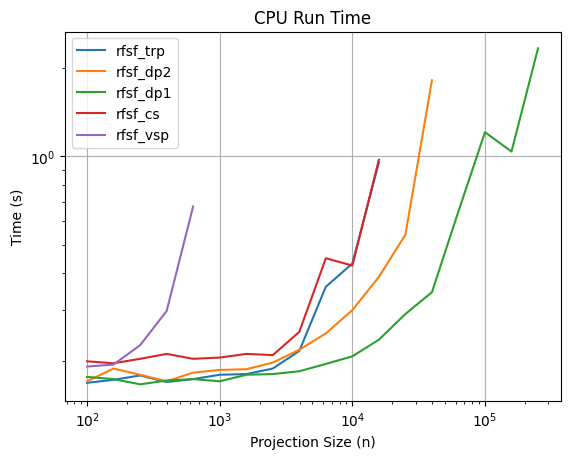

In [22]:
cpu_time_df.plot()
plt.loglog()
plt.xlabel(r"Projection Size (n)")
plt.ylabel(r"Time (s)")
plt.title("CPU Run Time")
plt.grid()

In [12]:
gpu_time_df = pd.DataFrame(gpu_time_results, index = n, columns=functions_to_call).round(3)

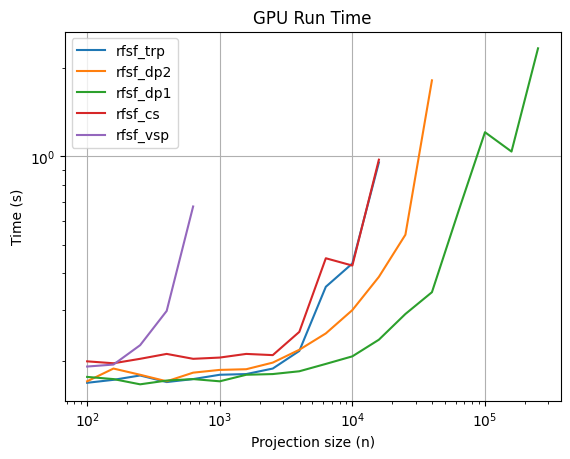

In [21]:
gpu_time_df.plot()
plt.loglog()
plt.xlabel(r"Projection size (n)")
plt.ylabel(r"Time (s)")
plt.title("GPU Run Time")
plt.grid()

In [14]:
cpu_memory_results = []
gpu_memory_results = []
for i, l in enumerate(n):
    cpu_row = []
    gpu_row = []
    for j, name in enumerate(functions_to_call):
        # cpu_current, cpu_peak, gpu_current, gpu_peak
        memory = memory_measurements[(name, l)]
        if memory == None:
            cpu_output = np.nan
            gpu_output = np.nan
        else:
            # cpu_peak
            cpu_output = memory[1] / 1e6
            # used_bytes
            gpu_output = memory[3] / 1e6
        cpu_row.append(cpu_output)
        gpu_row.append(gpu_output)
    cpu_memory_results.append(cpu_row)
    gpu_memory_results.append(gpu_row)

In [15]:
cpu_memory_df = pd.DataFrame(cpu_memory_results, index = n, columns=functions_to_call).round(3)

In [16]:
gpu_memory_df = pd.DataFrame(gpu_memory_results, index = n, columns=functions_to_call).round(3)

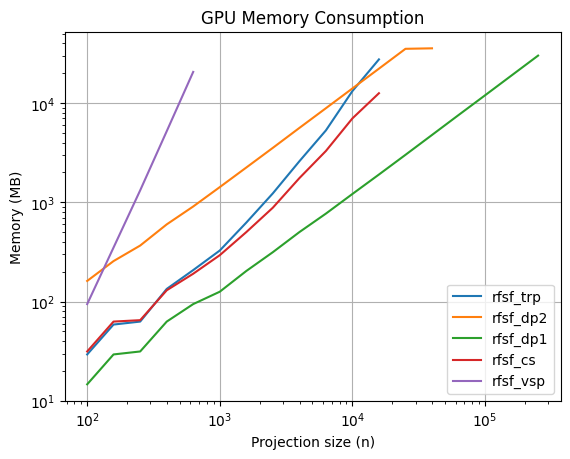

In [20]:
gpu_memory_df.plot()
plt.loglog()
plt.xlabel(r"Projection size (n)")
plt.ylabel(r"Memory (MB)")
plt.title("GPU Memory Consumption")
plt.grid()

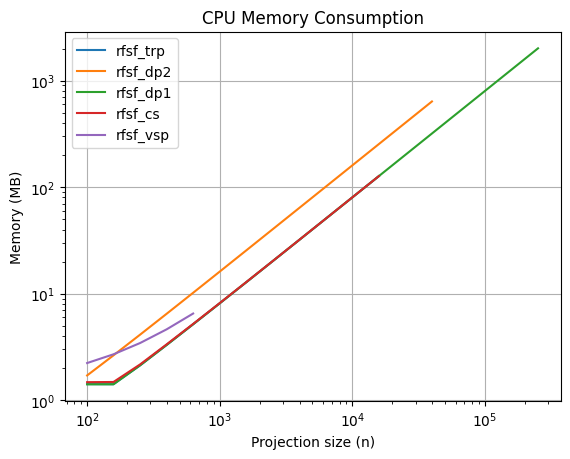

In [19]:
cpu_memory_df.plot()
plt.loglog()
plt.xlabel(r"Projection size (n)")
plt.ylabel(r"Memory (MB)")
plt.title("CPU Memory Consumption")
plt.grid()